# Nuclear Instance Segmentation and Classification

## EDA

The dataset contains image regions extracted from colon whole-slide images at 20x objective magnification along with their corresponding labels. Each label provides:

- Instance segmentation map
- Category of each nucleus
- Bounding box of each nucleus
- Centroid of each nucleus

The nuclear categories provided as part of this dataset are:

- Class 1: Neutrophil
- Class 2: Epithelial
- Class 3: Lymphocyte
- Class 4: Plasma
- Class 5: Neutrophil
- Class 6: Connective tissue

Each label is stored as a mat file. We provide some sample code (read_label.py) to provide information on how to read the labels. It should be noted that models trained on data at 40x may need to be adapted appropriately.

Detailed descriptipon about the dataset:
Graham, Simon, et al. "Lizard: A Large-Scale Dataset for Colonic Nuclear Instance Segmentation and Classification." Proceedings of the IEEE/CVF International Conference on Computer Vision. 2021.


In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [2]:
pic = input("Enter the picture name:")

Enter the picture name:consep_8


In [13]:
label = sio.loadmat(f'lizard_labels/Lizard_Labels/Labels/{pic}.mat') #! This filename is a placeholder!

# Load the instance segmentation map.
# This map is of type int32 and contains values from 0 to N, where 0 is background
# and N is the number of nuclei. 
# Shape: (H, W) where H and W is the height and width of the image.
inst_map = label['inst_map']
print(inst_map.shape)


# Load the index array. This determines the mapping between the nuclei in the instance map and the
# corresponing provided categories, bounding boxes and centroids.
nuclei_id = label['id'] # shape (N, 1), where N is the number of nuclei.

# Load the nuclear categories / classes. 
# Shape: (N, 1), where N is the number of nuclei.
classes = label['class']

# Load the bounding boxes.
# Shape: (N, 4), where N is the number of nuclei.
# For each row in the array, the ordering of coordinates is (y1, y2, x1, x2). 
bboxs = label['bbox'] 

# Load the centroids.
# Shape: (N, 2), where N is the number of nuclei.
# For each row in the array, the ordering of coordinates is (x, y).
centroids = label['centroid'] 

# Matching each nucleus with its corresponding class, bbox and centroid:

# Get the unique values in the instance map - each value corresponds to a single nucleus.
unique_values = np.unique(inst_map).tolist()[1:] # remove 0

# print(inst_map, nuclei_id, classes, bboxs, centroids, unique_values)

# Convert nuclei_id to list.
nuclei_id = np.squeeze(nuclei_id).tolist()

# Initialize lists to store data
indices = []
class_list = []
bbox_list = []
centroid_list = []

for value in unique_values:
    idx = nuclei_id.index(value)  # Get the index
    indices.append(idx)
    class_list.append(classes[idx].item())  # Convert to Python int
    bbox_list.append(bboxs[idx].tolist())
    centroid_list.append(centroids[idx].tolist())
#     print(f'Index: {idx}', f'Class: {class_}', f'Box: {bbox}', f'Centroid: {centroid}')

# Create a DataFrame
data = {'Index': indices, 'Class': class_list, 'Bounding Box': bbox_list, 'Centroid': centroid_list}
df = pd.DataFrame(data)

# Display the DataFrame
print(print(df.to_string(index=False)))

(500, 500)
 Index  Class         Bounding Box                                 Centroid
     0      2     [77, 97, 23, 47]   [34.72284644194757, 86.71910112359551]
     1      2 [289, 302, 222, 249]   [236.34977578475338, 294.304932735426]
     2      2   [61, 80, 319, 335]  [327.03636363636366, 70.03181818181818]
     3      2  [87, 103, 256, 273]   [264.1355140186916, 94.75700934579439]
     4      2     [53, 71, 24, 42]                [32.5, 61.07943925233645]
     5      2 [210, 232, 234, 249]  [240.52336448598132, 220.8271028037383]
     6      2 [149, 166, 308, 324] [316.10849056603774, 156.96226415094338]
     7      2   [53, 71, 361, 378]   [369.3853658536585, 61.16097560975609]
     8      2   [33, 46, 174, 195]  [184.44278606965173, 39.27363184079602]
     9      2     [16, 35, 48, 62]  [54.80099502487562, 24.875621890547265]
    10      2   [70, 88, 310, 325]            [316.6666666666667, 78.28125]
    11      2 [190, 207, 277, 291]  [283.2239583333333, 197.73958333333334]
 

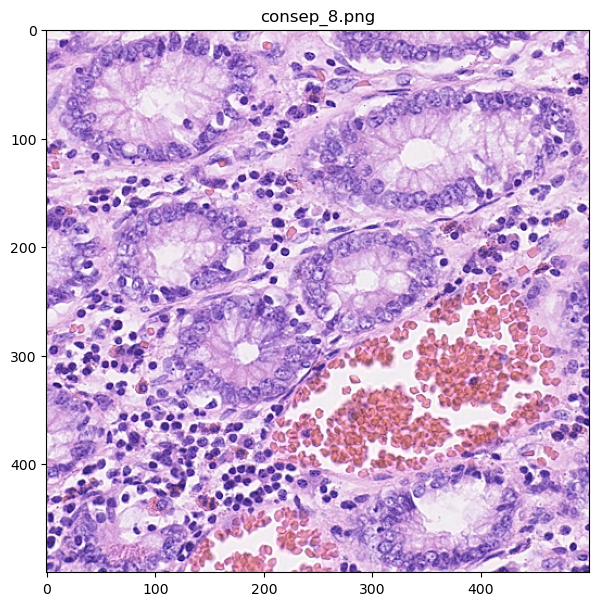

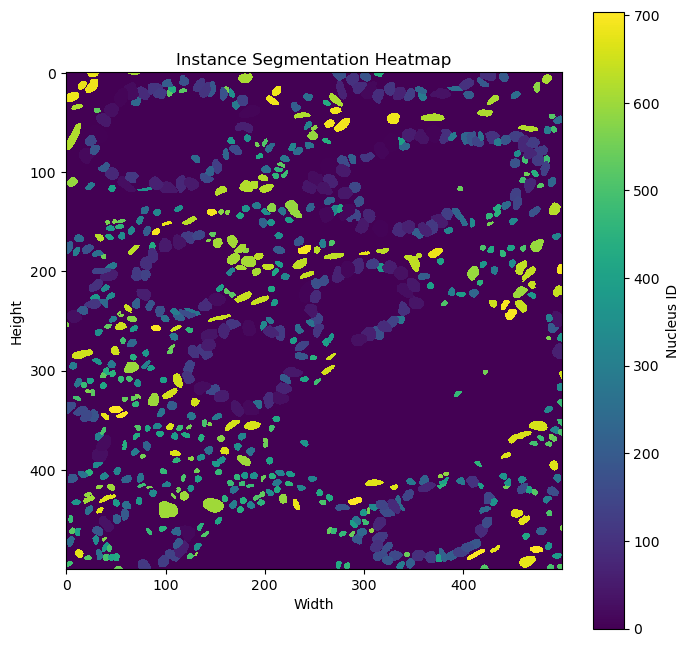

In [4]:
# Load the image
image_path = f'lizard_images1/Lizard_Images1/{pic}.png'
image = Image.open(image_path)

# Plot the image
plt.figure(figsize=(7, 8))
plt.imshow(image)
plt.title(f'{pic}.png')  
plt.axis('on')
plt.show()

# Plot the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(inst_map, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Nucleus ID')
plt.title('Instance Segmentation Heatmap')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()